In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part I. Theory

### (a)
By the mean value theorem, there exists $\alpha \in [-h, h]$ such that 
$$ f'(\alpha) = \frac{f(h) - f(-h)} {2h}.$$
Now applying the mean value theorem again, there exists $\beta \in [-\alpha, \alpha]$ such that
$$ f''(\beta) = \frac{f'(\alpha) - f'(0)} {\alpha} $$
Hence 
$$ \alpha f''(\beta) = \frac{f(h) - f(-h)} {2h} - f'(0). $$
Since $\alpha \in [-h, h]$ and $\beta \in [-\alpha, \alpha]$, this mean that we can find $\xi \in [-h, h]$ such that 
$$ \frac{h^2}6 f'''(\xi) = \alpha f''(\beta) = \frac{f(h) - f(-h)} {2h} - f'(0). $$
Now by rearranging the terms and adding a term on both sides, we get 
$$
\tilde D_h - f'(0) = \frac{h^2}6 f'''(\xi)+\frac{\delta f(h) - \delta f(-h)} {2h}
$$

### (b)
We have 

$$ |\tilde D_h - f'(0)| \le \bigg|\frac {h^2} 6 f'''(\xi)\bigg| + \bigg|\frac {\delta f(h) - \delta f(-h)} {2h}\bigg| $$

Now we know that $|\delta f(x) \le \varepsilon$ for $x \in [-a, a]$. Therefore,

$$ \bigg|\frac {\delta f(h) - \delta f(-h)} {2h}\bigg| \le \frac {|\delta f(h)| + |\delta f(-h)|} {2h} \le \frac {2\varepsilon} {2h} = \frac \varepsilon h.$$

On the other hand, since $\xi \in [-h, h]$ we must have $\xi \le \max_{x \in [-a,a]}|f'''(x)| = M$. Putting it together gives the desired inequality:

$$ |\tilde D_h - f'(0)| \le \frac \varepsilon h + \frac {Mh^2} 6. $$


We show below a graph of the bound $B(h) = \frac \varepsilon h + \frac{Mh^2} 6 $. In order to find the value of $h$ that minimize $B(h)$, we compute its derivative:
$$ B'(h) = -\frac {\varepsilon} {h^2} + \frac{Mh} 3 $$
Therefore $B'(h)=0$ and $B(h)$ is minimal for $h = \sqrt[3]{\frac {3\varepsilon} M}$. It is a bad idea to pick $h$ too small because then the bound is not minimal. Intuitively, if we pick $h$ too close to $\varepsilon$, the error becomes too large compared to $h$.

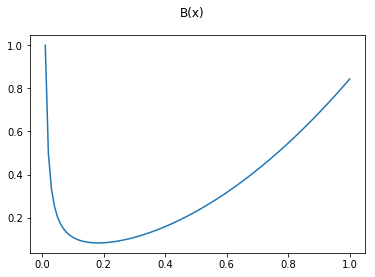

In [2]:
epsilon = 0.01
M = 5

def bound(h):
    return epsilon / h + M * h * h / 6

xs = np.linspace(epsilon, 1, 100)
ys = [bound(x) for x in xs]
plt.plot(xs, ys)
plt.suptitle("B(x)")
plt.show()

## Part II. Lab

### (a)
We decide to take the function $$
f(x) = \arctan(5x).
$$
We start by defining it, along with setting two variables that define the interval we will look at. In this case, we will focus on the interval $[-1, 1]$.

In [3]:
def f(x):
    return np.arctan(5. * x)

(a)
We can proceed to define a function that computes the Lagrange polynomial of this function using equally spaced nodes. Note that we use higher-order functions, i.e. the functions themselves return a function.

In [4]:
def lagrange_basis(j, xs):
    ''' Compute the j-th Lagrange basis of `f` using the nodes given by `xs` '''
    def basis(x):
        prod = 1.0
        for i in range(len(xs)):
            if i != j:
                prod *= (x - xs[i]) / (xs[j] - xs[i])
        return prod
    return basis

def lagrange_interpolation(n):
    ''' Compute the n-th degree Lagrange polynomial associated with `f` '''
    xs = np.linspace(-1, 1, n)
    bases = [lagrange_basis(i, xs) for i in range(len(xs))]
    def poly(x):
        sum = 0.0
        for i in range(len(xs)):
            sum += f(xs[i]) * bases[i](x)
        return sum
    return poly

In order to illustrate the Runge's phenomenon, we will now draw the curve of $f$ along with the Lagrange polynomials corresponding to $f$ for different degrees. In addition, we also plot the difference between $f$ and the Lagrange polynomials.

We observe that as the degree of the polynomials increase, the oscillation of the polynomials increase considerably at the edge: this is Runge's phenomenon. Note that polynomials with a higher degree have a smaller error in the middle area, and that it is only on the edges that they start oscillating.

Another remark is that the magnitude of the oscillations grow very quickly as the degree increase. We only draw up to $n=20$ because for higher values the magnitude of the oscillation is not even comparable anymore.

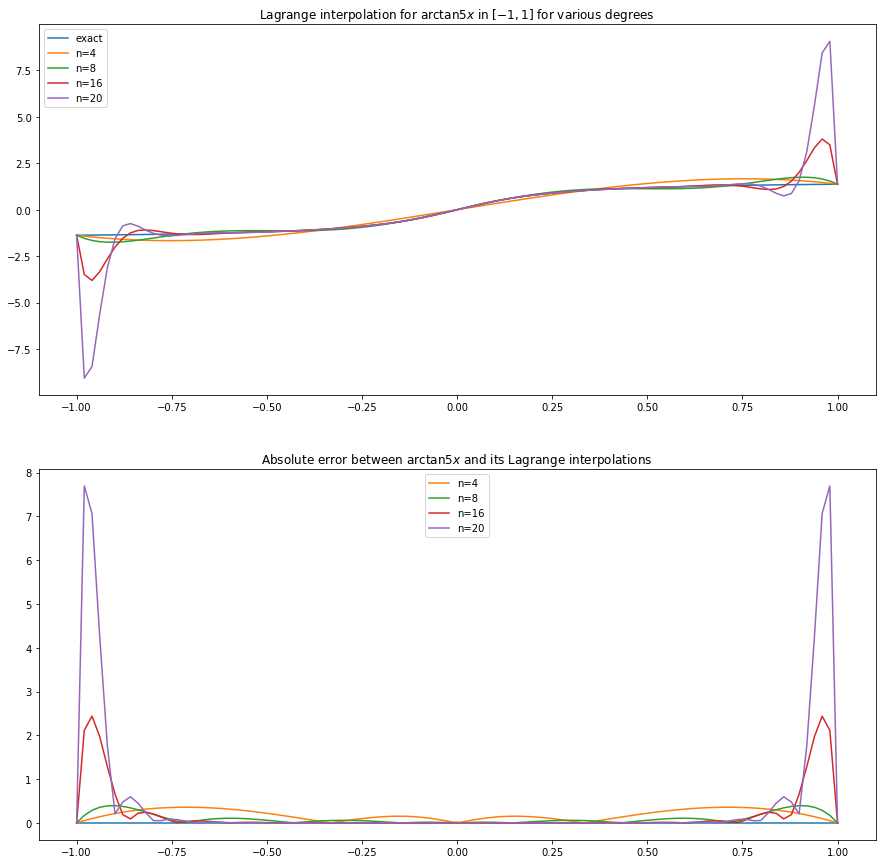

In [5]:
fig = plt.figure(figsize=(15, 15))
plt1 = fig.add_subplot(211)
plt2 = fig.add_subplot(212)

# Degrees of the polynomial
degrees = [4, 8, 16, 20]

# Draw the curve of f(x)
xs = np.linspace(-1, 1, 100)
ys = [f(x) for x in xs]
plt1.plot(xs, ys, label='exact')
plt2.plot(xs, [0 for x in xs])

# Draw the curves for each interpolation
for d in degrees:
    interpolation = lagrange_interpolation(d)
    xs = np.linspace(-1, 1, 100)
    ys = [interpolation(x) for x in xs]
    diffs = [np.abs(f(x) - interpolation(x)) for x in xs]
    plt1.plot(xs, ys, label=('n=' + str(d)))
    plt2.plot(xs, diffs, label=('n=' + str(d)))
    
plt1.legend()
plt1.set_title(r'Lagrange interpolation for $\arctan 5x$ in $[-1, 1]$ for various degrees ')
plt2.legend()
plt2.set_title(r'Absolute error between $\arctan 5x$ and its Lagrange interpolations')
plt.show()

### (b)
We now repeat the same experiment, redefining the functions to use Chebyschev nodes this time:

In [6]:
def lagrange_interpolation(n):
    ''' Compute the n-th degree Lagrange polynomial associated with `f` '''
    xs = [np.cos((2.*k-1.)/(2.*n)*np.pi) for k in range(1, n+1)]
    bases = [lagrange_basis(i, xs) for i in range(len(xs))]
    def poly(x):
        sum = 0.0
        for i in range(len(xs)):
            sum += f(xs[i]) * bases[i](x)
        return sum
    return poly

We now draw again the curve of $f$ along with the Lagrange polynomials corresponding to $f$ for the same degrees as previously. In addition, we also plot the difference between $f$ and the Lagrange polynomials. This time, the behaviour is closer to what we could expect: as the degree of the polynomial increase, the error is decreased. Therefore using Chebyschev's nodes instead of equally spaced nodes appears to be a way of avoiding Runge's phenomenon.

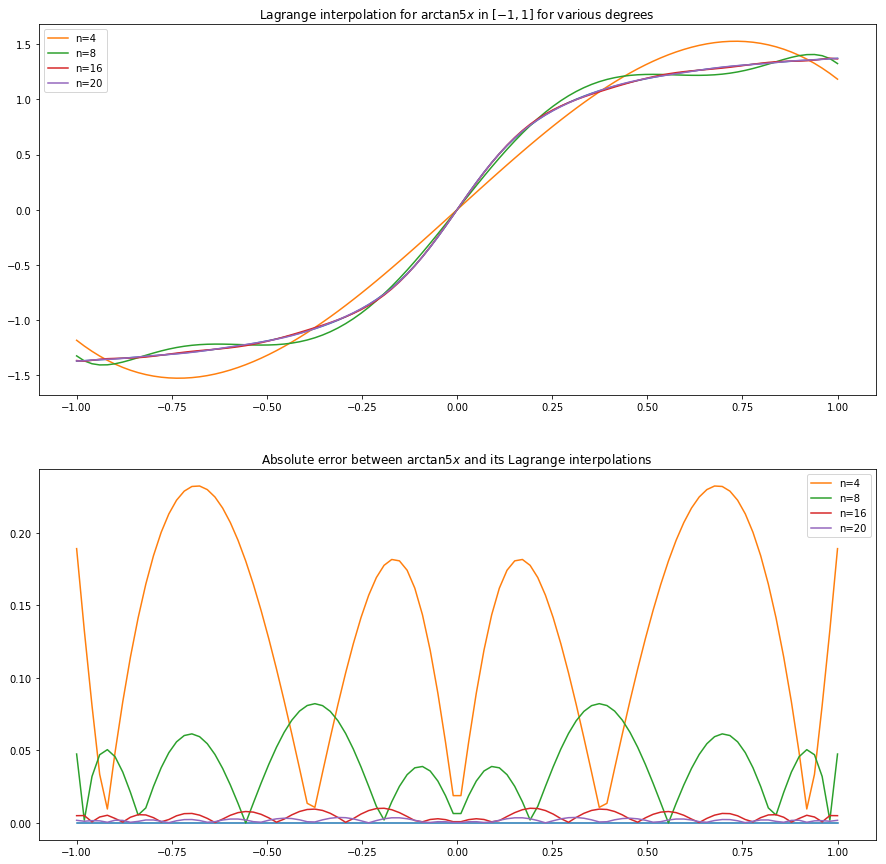

In [7]:
fig = plt.figure(figsize=(15, 15))
plt1 = fig.add_subplot(211)
plt2 = fig.add_subplot(212)

degrees = [4, 8, 16, 20]

xs = np.linspace(-1, 1, 100)
ys = [f(x) for x in xs]
plt1.plot(xs, ys)
plt2.plot(xs, [0 for x in xs])

for d in degrees:
    interpolation = lagrange_interpolation(d)
    xs = np.linspace(-1, 1, 100)
    ys = [interpolation(x) for x in xs]
    diffs = [np.abs(f(x) - interpolation(x)) for x in xs]
    plt1.plot(xs, ys, label=('n=' + str(d)))
    plt2.plot(xs, diffs, label=('n=' + str(d)))
    
plt1.legend()
plt1.set_title(r'Lagrange interpolation for $\arctan 5x$ in $[-1, 1]$ for various degrees ')
plt2.legend()
plt2.set_title(r'Absolute error between $\arctan 5x$ and its Lagrange interpolations')
plt.show()

### (c)
In order to compute the Bernstein polynomials, we use use the recursive definition
$$ B_{i,j}(x) = \begin{cases}
(1-x)B_{i, j-1}(x) + xB_{i-1,j}, & \text{ if } j \ge i \ge 0 \\
0, & \text { otherwise }
\end{cases}.
$$
We first define a function that computes all the n-th degrees Bernstein polynomials, evaluated at $x$. In order to "verify" that the function is correct, we also plot all the Bernstein polynomials of degree 4.

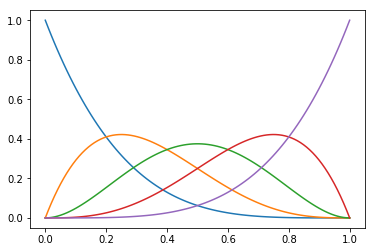

In [8]:
def bernsteins(x, n):
    ''' Compute the n+1 n-th degree Bernstein polynomials evaluated at x'''
    bs = np.zeros(n+1)
    if n == 0:
        bs[0] = 1.
    else:
        bs[0], bs[1] = 1. - x, x
    for i in range(2, n+1):
        bs[i] = x * bs[i-1]
        for j in range(i-1, 0, -1):
            bs[j] = x * bs[j-1] + (1. - x) * bs[j]
        bs[0] *= (1. - x)
    return bs

def test_plot():
    xs = np.linspace(0, 1, 100)
    yss = [[],[],[],[], []]
    for x in xs:
        bs = bernsteins(x, 4)
        for i in range(5):
            yss[i].append(bs[i])
    for i in range(5):
        plt.plot(xs, yss[i])
    plt.show()
    
test_plot()

We can then use this Bernstein basis to approximate a function by defining the `bernsteins_approximation` function. Note that since Bernstein polynomials are only defined on $[0,1]$, we need to rescale $f$ to make sure it stays within this range.

What we see is that Bernstein polynomials do not seem to be affected by Runge's phenomenon. Instead, the absolute error gets smaller within *all* the interval as the degree of the polynomials increase.

In [9]:
def bernsteins_approximation(f, n, a, b):
    ''' Compute the n-th degree Bernsteins approximation of f in the interval [a,b]'''
    def h(x):
        x2 = (x - a) / (b - a)
        bs = bernsteins(x2, n)
        s = 0
        for i in range(n+1):
            factor = f((float(i) / n) * (b-a) + a)
            s += bs[i] * factor
        return s
    return h

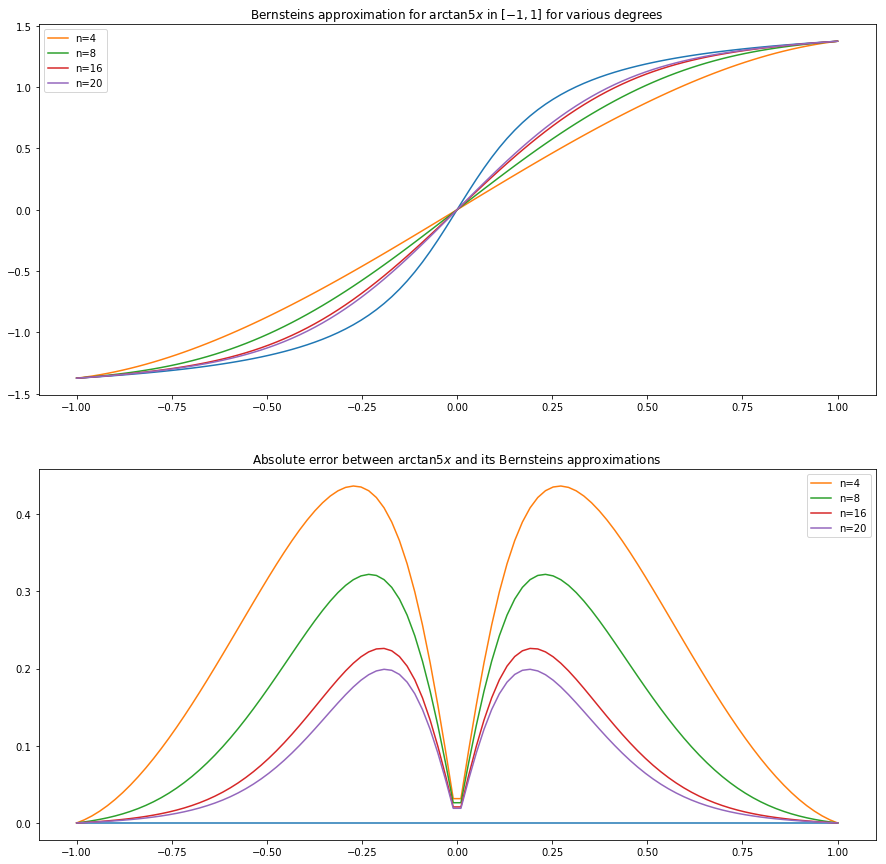

In [10]:
fig = plt.figure(figsize=(15, 15))
plt1 = fig.add_subplot(211)
plt2 = fig.add_subplot(212)

degrees = [4, 8, 16, 20]

xs = np.linspace(-1, 1, 100)
ys = [f(x) for x in xs]
plt1.plot(xs, ys)
plt2.plot(xs, [0 for x in xs])

for d in degrees:
    approximation = bernsteins_approximation(f, d, -1, 1)
    xs = np.linspace(-1, 1, 100)
    ys = [approximation(x) for x in xs]
    diffs = [np.abs(f(x) - approximation(x)) for x in xs]
    plt1.plot(xs, ys, label=('n=' + str(d)))
    plt2.plot(xs, diffs, label=('n=' + str(d)))
    
plt1.legend()
plt1.set_title(r'Bernsteins approximation for $\arctan 5x$ in $[-1, 1]$ for various degrees ')
plt2.legend()
plt2.set_title(r'Absolute error between $\arctan 5x$ and its Bernsteins approximations')
plt.show()